# Data Wrangling Project
###### Submitted by Mohamed Abido as a part of the Data Analyst Nanodegree at Udacity.

In [1]:
# importing libs used in this project
#%matplotlib notebook
%matplotlib inline
import pandas as pd
import datetime as dt
import numpy as np
import requests
import tweepy
import json
import re
import seaborn as sns
#%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
#from nltk import pos_tag
warnings.simplefilter('ignore')
mpl.rcParams['figure.figsize'] = (10,10)

## Gathering Process

> Will be gathering each of the three pieces of data as described below :

> 1- The WeRateDogs Twitter archive. Download this file "twitter_archive_enhanced.csv" manually by clicking the following link: (https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv)

> 2- The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and will be downloaded programmatically using the Requests library and the following URL: (https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv)

> 3- Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

**1) Gathering twitter archive :**

In [2]:
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")

In [3]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

**2) Gathering image predictions : **

In [4]:
# Download the file (image-predictions.tsv) hosted on Udacity's server
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

# Save the file locally in the project's folder
with open(url.split('/')[-1], mode = 'wb') as file:
    file.write(response.content)

# Read the file into a dataframe 'images_pred'
images_pred = pd.read_csv('image-predictions.tsv', sep = '\t')

In [5]:
images_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


** 3) Gathering data from Twitter API : **

In [33]:
consumer_key = 'CONSUMER KEY'
consumer_secret = 'CONSUMER SECRET'
access_token = 'ACCESS TOKEN'
access_secret = 'ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,
                 wait_on_rate_limit = True,
                 wait_on_rate_limit_notify = True)

#parser = tweepy.parsers.JSONParser(),

In [34]:
'''Run the following code only once to download tweet_json using Twitter API'''

with open('tweet_json.txt', 'a') as file:
    for tweet_id in twitter_archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, file)
            file.write('\n')
        except:
            continue

Rate limit reached. Sleeping for: 270
Rate limit reached. Sleeping for: 349


In [6]:
# Create list of tweets
twitter_data = []

file = open('tweet_json.txt', "r")

for row in file:
    try:
        tweet = json.loads(row)
        twitter_data.append(tweet)
    except:
        continue
        
file.close()

# Read the selected vars into a dataframe

json_data = pd.DataFrame()
json_data['id'] = list(map(lambda tweet: tweet['id'], twitter_data))
json_data['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], twitter_data))
json_data['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], twitter_data))
json_data['created_at'] = list(map(lambda tweet: tweet['created_at'], twitter_data))



----------


## Assessing Process

** 1) Twitter archive dataset **

In [7]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1797,677269281705472000,NaN,NaN,2015-12-16 23:29:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest pupper I've ever seen. 10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677269281...,10,10,the,None,None,pupper,None
2013,672231046314901505,NaN,NaN,2015-12-03 01:49:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Exotic underwater dog here. Very shy. Wont ret...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672231046...,5,10,None,None,None,None,None
69,879050749262655488,NaN,NaN,2017-06-25 18:56:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Steven. He has trouble relating to oth...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/879050749...,11,10,Steven,None,None,None,None
38,884925521741709313,NaN,NaN,2017-07-12 00:01:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Earl. He found a hat. Nervous about wh...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884925521...,12,10,Earl,None,None,None,None
157,861288531465048066,NaN,NaN,2017-05-07 18:36:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",HI. MY. NAME. IS. BOOMER. AND. I. WANT. TO. SA...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/861288531...,13,10,None,None,None,None,None


In [8]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
# As seen blew there are values that are less than 10
twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [11]:
twitter_archive[twitter_archive.rating_numerator < 10]
twitter_archive[twitter_archive.rating_numerator < 10].count()

tweet_id                      440
in_reply_to_status_id          12
in_reply_to_user_id            12
timestamp                     440
source                        440
text                          440
retweeted_status_id             9
retweeted_status_user_id        9
retweeted_status_timestamp      9
expanded_urls                 430
rating_numerator              440
rating_denominator            440
name                          440
doggo                         440
floofer                       440
pupper                        440
puppo                         440
dtype: int64

In [12]:
# As seen belw there are denominator values other than 10
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [13]:
twitter_archive[twitter_archive.rating_denominator != 10]
twitter_archive[twitter_archive.rating_denominator != 10].count()

tweet_id                      23
in_reply_to_status_id          5
in_reply_to_user_id            5
timestamp                     23
source                        23
text                          23
retweeted_status_id            1
retweeted_status_user_id       1
retweeted_status_timestamp     1
expanded_urls                 19
rating_numerator              23
rating_denominator            23
name                          23
doggo                         23
floofer                       23
pupper                        23
puppo                         23
dtype: int64

In [14]:
# There are some missing values "None" in the names column
twitter_archive['name'].value_counts()

None        745
a            55
Charlie      12
Cooper       11
Oliver       11
Lucy         11
Lola         10
Penny        10
Tucker       10
Bo            9
Winston       9
Sadie         8
the           8
Buddy         7
an            7
Toby          7
Daisy         7
Bailey        7
Bella         6
Rusty         6
Milo          6
Stanley       6
Koda          6
Oscar         6
Leo           6
Scout         6
Jack          6
Jax           6
Dave          6
Gus           5
           ... 
Clifford      1
Gordon        1
Kona          1
Karll         1
Jeremy        1
Gabby         1
by            1
Kulet         1
Dook          1
Tiger         1
Shiloh        1
Banjo         1
Jackie        1
Amy           1
Meera         1
Joey          1
Kellogg       1
Ester         1
Timmy         1
Diogi         1
Mary          1
Striker       1
Maks          1
Pancake       1
Mairi         1
Tonks         1
Strudel       1
Obie          1
Ridley        1
Rinna         1
Name: name, Length: 957,

In [15]:
twitter_archive.name.sort_values()

1035            Abby
1021            Abby
938              Ace
1933            Acro
1327           Adele
1934           Aiden
77               Aja
480            Akumi
820               Al
875           Albert
1954          Albert
144            Albus
412            Albus
1115         Aldrick
2046       Alejandro
374        Alexander
1189    Alexanderson
486              Alf
2238           Alfie
661            Alfie
367            Alfie
1616           Alfie
858            Alfie
51              Alfy
201            Alice
1701           Alice
1495           Amber
1334         Ambrose
2078             Amy
2195          Amélie
            ...     
852               my
988              not
335              not
1747      officially
1206             old
993              one
1936             one
924              one
369              one
2326           quite
169            quite
118            quite
193            quite
2030           space
22              such
2345             the
2346         

In [16]:
twitter_archive[twitter_archive['expanded_urls'].isnull()].loc[:,['tweet_id',
                                                                  'expanded_urls', 
                                                                  'in_reply_to_status_id', 
                                                                  'in_reply_to_user_id',
                                                                 'retweeted_status_id']].head(10)

,tweet_id,expanded_urls,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id
30,886267009285017600,NaN,8.862664e+17,2.281182e+09,NaN
55,881633300179243008,NaN,8.816070e+17,4.738443e+07,NaN
64,879674319642796034,NaN,8.795538e+17,3.105441e+09,NaN
113,870726314365509632,NaN,8.707262e+17,1.648776e+07,NaN
148,863427515083354112,NaN,8.634256e+17,7.759620e+07,NaN
179,857214891891077121,NaN,8.571567e+17,1.806710e+08,NaN
185,856330835276025856,NaN,NaN,NaN,8.563302e+17
186,856288084350160898,NaN,8.562860e+17,2.792810e+08,NaN
188,855862651834028034,NaN,8.558616e+17,1.943518e+08,NaN
189,855860136149123072,NaN,8.558585e+17,1.361572e+07,NaN


In [17]:
# Only 78 tweet are replies - can be dropped
twitter_archive['in_reply_to_status_id'].count()

78

In [18]:
# There's a problem with extracting wrong ratings from text.
pd.set_option('display.max_colwidth', -1)
twitter_archive[twitter_archive.tweet_id == 681340665377193984].loc[:,[
   'text',
   'rating_numerator',
   'rating_denominator'
]]

,text,rating_numerator,rating_denominator
1689,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10


In [19]:
twitter_archive[twitter_archive.text.str.contains(r"(\d+\.\d*\/\d+)")].loc[:,[
   'tweet_id',
   'text',
   'rating_numerator',
   'rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


------------------
**2) Image predictions dataset :**

In [20]:
images_pred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1339,758474966123810816,https://pbs.twimg.com/media/Coak48zWAAAhBxV.jpg,1,Pembroke,0.546145,True,Cardigan,0.244200,True,German_shepherd,0.100429,True
1432,773308824254029826,https://pbs.twimg.com/media/CrtYRMEWIAAUkCl.jpg,1,shopping_cart,0.572349,False,Labrador_retriever,0.151406,True,shopping_basket,0.107102,False
961,705898680587526145,https://pbs.twimg.com/media/CcvbGj5W8AARjB6.jpg,1,collie,0.808276,True,Border_collie,0.059437,True,groenendael,0.026720,True
1420,771770456517009408,https://pbs.twimg.com/media/CrXhIqBW8AA6Bse.jpg,1,papillon,0.533180,True,collie,0.192031,True,Border_collie,0.121626,True
295,671357843010908160,https://pbs.twimg.com/media/CVEkZaPXIAEw5vr.jpg,1,Italian_greyhound,0.831757,True,toy_terrier,0.043306,True,Chihuahua,0.036773,True


In [21]:
images_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
images_pred['jpg_url'].value_counts

<bound method IndexOpsMixin.value_counts of 0       https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg                                        
1       https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg                                        
2       https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg                                        
3       https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg                                        
4       https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg                                        
5       https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg                                        
6       https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg                                        
7       https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg                                        
8       https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg                                        
9       https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg                                     

------------------
**3) twitter json dataset :**

In [23]:
json_data.sample(5)

,id,retweet_count,favorite_count,created_at
615,795464331001561088,27226,54998,Mon Nov 07 03:14:10 +0000 2016
1447,695095422348574720,676,2841,Thu Feb 04 04:03:57 +0000 2016
1312,706291001778950144,515,1831,Sun Mar 06 01:31:11 +0000 2016
1321,705591895322394625,1286,3421,Fri Mar 04 03:13:11 +0000 2016
369,828046555563323392,3208,12790,Sun Feb 05 01:04:17 +0000 2017


In [24]:
json_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 4 columns):
id                2346 non-null int64
retweet_count     2346 non-null int64
favorite_count    2346 non-null int64
created_at        2346 non-null object
dtypes: int64(3), object(1)
memory usage: 73.4+ KB


In [25]:
json_data.describe()

,id,retweet_count,favorite_count
count,2.346000e+03,2346.000000,2346.000000
mean,7.423380e+17,3065.088235,8115.753623
std,6.835504e+16,5089.553260,12200.429826
min,6.660209e+17,0.000000,0.000000
25%,6.783824e+17,612.250000,1410.250000
50%,7.189556e+17,1434.000000,3565.000000
75%,7.987010e+17,3574.750000,10047.500000
max,8.924206e+17,78212.000000,144169.000000


#### Assessing Issues:
###### Quality :
 
- Issue: Replies and Retweets should be removed.
- Issue: Some rows don't have images(expanded_urls).
- Issue: Some rows have invalid names in the name column.
- Issue: Some values in (p1, p2, p3) columns have '_' representing a space.
- Issue: In json data first column id should be tweet_id that can help when merging datasets later.
- Issue: tweet_id should be an object not an int.
- Issue: timestamp should be a date object not a str.
- Issue: Some columns are not useful.
- Issue: There's a problem with some of the extracted ratings from text. (tweet_id = 883482846933004288, 832215909146226688 and others).

###### Tidiness :

- Issue: Dog stage values (doggo, floofer, pupper, puppo) should be under one column.
- Issue: Columns can have better arrangement
- Issue: There's no column that provides the gender of dogs. Create a gender column and detect the dog's gender from text.
- Issue: image_pred has many columns. only store the true value and its level of confidence.
- Issue: Some column names could have more descriptive names.

-----------

## Cleaning Process

**1) Twitter archive dataset :**

In [26]:
# Copy twitter_archive into another dataframe for cleaning
twitter_arc_clean = twitter_archive.copy()
twitter_arc_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

* Define : Replies and Retweets
> Solution : For simplicity, remove them.
* Code

In [27]:
# Remove Replies
twitter_arc_clean = twitter_arc_clean[twitter_arc_clean['in_reply_to_status_id'].isnull()]
# Remove Retweets
twitter_arc_clean = twitter_arc_clean[twitter_arc_clean['retweeted_status_id'].isnull()]

* Test 

In [28]:
# This results in removing 259 rows
len(twitter_arc_clean)

2097

* Define : Dog stage values (doggo, floofer, pupper, puppo) should be under one variable.
> Solution : Combine each dog stage column into a single column named "stage".

* Code

In [29]:
twitter_arc_clean['dog_stage'] = twitter_arc_clean[['doggo', 'floofer','pupper','puppo']].apply(lambda stage: ''.join(stage), axis=1)

twitter_arc_clean['dog_stage'].replace("NoneNoneNoneNone","NaN", inplace=True)
twitter_arc_clean['dog_stage'].replace("doggoNoneNoneNone","doggo", inplace=True)
twitter_arc_clean['dog_stage'].replace("NoneflooferNoneNone","floofer", inplace=True)
twitter_arc_clean['dog_stage'].replace("NoneNonepupperNone","pupper", inplace=True)
twitter_arc_clean['dog_stage'].replace("NoneNoneNonepuppo","puppo", inplace=True)

twitter_arc_clean = twitter_arc_clean.sort_values('dog_stage').drop_duplicates('tweet_id', keep = 'last')

* Test

In [30]:
twitter_arc_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,NaN
1602,685973236358713344,NaN,NaN,2016-01-09 23:55:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lorelei. She's contemplating her existence and the eventual heat death of the universe. 11/10 very majestic https://t.co/xbUoULOIS8,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685973236358713344/photo/1,11,10,Lorelei,None,None,None,None,NaN
1601,686003207160610816,NaN,NaN,2016-01-10 01:54:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Hammond. He's a peculiar pup. Loves long walks. Bark barely audible. Too many legs. 3/10 must be rare https://t.co/NOIiRWr5Jf,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686003207160610816/photo/1,3,10,Hammond,None,None,None,None,NaN
1599,686034024800862208,NaN,NaN,2016-01-10 03:57:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Your fav crew is back and this time they're embracing cannabis culture. 12/10 for all https://t.co/oSvRDuMm1D,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686034024800862208/photo/1,12,10,None,None,None,None,None,NaN
1597,686050296934563840,NaN,NaN,2016-01-10 05:01:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Flávio. He's a Macedonian Poppycock. 97% floof. Jubilant af. 11/10 personally I'd pet the hell out of https://t.co/BUyX7isHRg,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686050296934563840/photo/1,11,10,Flávio,None,None,None,None,NaN
1596,686286779679375361,NaN,NaN,2016-01-10 20:41:33 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",When bae calls your name from across the room. 12/10 (vid by @christinemcc98) https://t.co/xolcXA6gxe,NaN,NaN,NaN,https://vine.co/v/iMZx6aDbExn,12,10,None,None,None,None,None,NaN
1595,686358356425093120,NaN,NaN,2016-01-11 01:25:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Heartwarming scene here. Son reuniting w father after coming home from deployment. Very moving. 10/10 for both pups https://t.co/95JJevQOWW,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686358356425093120/photo/1,10,10,None,None,None,None,None,NaN
1593,686386521809772549,NaN,NaN,2016-01-11 03:17:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Crimson. He's a Speckled Winnebago. Main passions are air hockey &amp; parkour. 11/10 would pet thoroughly https://t.co/J5aI7SjzDc,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686386521809772549/photo/1,11,10,Crimson,None,None,None,None,NaN
1592,686394059078897668,NaN,NaN,2016-01-11 03:47:50 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This pup's having a nightmare that he forgot to type a paper due first thing in the morning. 12/10 (vid by ... https://t.co/CufnbUT0pB,NaN,NaN,NaN,https://vine.co/v/iMqBebnOvav,12,10,None,None,None,None,None,NaN
1591,686606069955735556,NaN,NaN,2016-01-11 17:50:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Horace. He was practicing his levitation, minding his own business when a rogue tennis ball spooked him. 10/10 https://t.co/tB9xYjMyZd",NaN,NaN,NaN,https://twitter.com/dog_rates/status/686606069955735556/photo/1,10,10,Horace,None,None

* Define : Some rows don't have images.
> Solution : Removal of rows with no expanded_urls and changing the column's name.

* Code

In [31]:
twitter_arc_clean = twitter_arc_clean.dropna(subset=['expanded_urls'])


* Test

In [32]:
twitter_arc_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
824,769940425801170949,NaN,NaN,2016-08-28 16:51:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Klein. These pics were taken a month apart. He knows he's a stud now. 12/10 total heartthrob https://t.co/guDkLrX8zV,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/769940425801170949/photo/1,https://twitter.com/dog_rates/status/769940425801170949/photo/1",12,10,Klein,None,None,None,None,NaN
1416,698635131305795584,NaN,NaN,2016-02-13 22:29:29 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we are witnessing five Guatemalan Birch Floofs in their natural habitat. All 12/10 (Vid by @pootdanielle) https://t.co/rb8nzVNh7F,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698635131305795584/video/1,12,10,None,None,None,None,None,NaN
352,831315979191906304,NaN,NaN,2017-02-14 01:35:49 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",I couldn't make it to the #WKCDogShow BUT I have people there on the ground relaying me the finest pupper pics possible. 13/10 for all https://t.co/jd6lYhfdH4,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/831315979191906304/photo/1,https://twitter.com/dog_rates/status/831315979191906304/photo/1,https://twitter.com/dog_rates/status/831315979191906304/photo/1,https://twitter.com/dog_rates/status/831315979191906304/photo/1",13,10,None,None,None,pupper,None,pupper
1372,702217446468493312,NaN,NaN,2016-02-23 19:44:20 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I know it's tempting, but please stop sending in pics of Donald Trump. Thank you ...9/10 https://t.co/y35Y1TJERY",NaN,NaN,NaN,https://twitter.com/dog_rates/status/702217446468493312/photo/1,9,10,None,None,None,None,None,NaN
910,757611664640446465,NaN,NaN,2016-07-25 16:21:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cooper. He tries to come across as feisty but it never works for very long. 12/10 https://t.co/AVks8DjHwB,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/757611664640446465/photo/1,https://twitter.com/dog_rates/status/757611664640446465/photo/1,https://twitter.com/dog_rates/status/757611664640446465/photo/1",12,10,Cooper,None,None,None,None,NaN


* Define : Some rows have invalid names.
> Solution : replace invalid names with None & Replacing None in name column with NaN.
* Code

In [33]:
twitter_archive['name'].value_counts()
#invalid = ['the', 'such', 'all', 'is', 'a', 'an', 'very', 'just', 'officially']

twitter_arc_clean['name'].replace("the","None", inplace=True)
twitter_arc_clean['name'].replace("such","None", inplace=True)
twitter_arc_clean['name'].replace("all","None", inplace=True)
twitter_arc_clean['name'].replace("a","None", inplace=True)
twitter_arc_clean['name'].replace("an","None", inplace=True)
twitter_arc_clean['name'].replace("very","None", inplace=True)
twitter_arc_clean['name'].replace("just","None", inplace=True)
twitter_arc_clean['name'].replace("officially","None", inplace=True)

twitter_arc_clean['name'] = twitter_arc_clean['name'].replace('None', np.NaN)
#warnings.simplefilter('ignore')

* Test

In [34]:
twitter_arc_clean.name.sort_values()

1021    Abby        
1035    Abby        
938     Ace         
1933    Acro        
1327    Adele       
1934    Aiden       
77      Aja         
480     Akumi       
820     Al          
1954    Albert      
875     Albert      
412     Albus       
144     Albus       
1115    Aldrick     
2046    Alejandro   
374     Alexander   
1189    Alexanderson
486     Alf         
858     Alfie       
1616    Alfie       
367     Alfie       
2238    Alfie       
51      Alfy        
1701    Alice       
201     Alice       
1495    Amber       
1334    Ambrose     
2078    Amy         
2195    Amélie      
780     Anakin      
         ...        
1797    NaN         
1349    NaN         
1049    NaN         
1357    NaN         
1609    NaN         
1822    NaN         
1584    NaN         
352     NaN         
1429    NaN         
1428    NaN         
1850    NaN         
1579    NaN         
608     NaN         
1825    NaN         
1838    NaN         
1410    NaN         
996     NaN  

* Define : There's no column that provides the gender of dogs.
> Solution : Create a gender column and detect the dog's gender from text.
* Code

In [35]:
M = ["He", "he", "His" , "his", "him", "Him", "he's", "He's", "himself"]
F = ["She", "she", "Her", "her", "hers", "Hers", "she's", "She's", "herself"]

dog_gender = []

for text in twitter_arc_clean['text']:
   
    if any(map(lambda x:x in M, text.split())):
        dog_gender.append('M')

    elif any(map(lambda x:x in F, text.split())):
        dog_gender.append('F')
    else:
        dog_gender.append('NaN')


twitter_arc_clean['dog_gender'] = dog_gender
twitter_arc_clean.dog_gender.value_counts()

M      1045
NaN    703 
F      346 
Name: dog_gender, dtype: int64

* Test

In [36]:
twitter_arc_clean.sample(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage,dog_gender
1586,686760001961103360,NaN,NaN,2016-01-12 04:01:58 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This pupper forgot how to walk. 12/10 happens to all of us (vid by @bbuckley96) https://t.co/KFTrkSOuu3,NaN,NaN,NaN,https://vine.co/v/iMvubwT260D,12,10,NaN,None,None,pupper,None,pupper,NaN


* Define: There's a problem with some of the extracted ratings from text. (tweet_id = 883482846933004288, 832215909146226688 and others).

> Solution : Fix by adding the correct rating.

* Code

In [37]:
twitter_arc_clean.loc[(twitter_arc_clean['tweet_id'] == 883482846933004288)
                          & (twitter_arc_clean['rating_numerator'] == 5), 
                          ['rating_numerator']] = 13.5

twitter_arc_clean.loc[(twitter_arc_clean['tweet_id'] == 832215909146226688)
                          & (twitter_arc_clean['rating_numerator'] == 75), 
                          ['rating_numerator']] = 9.75

twitter_arc_clean.loc[(twitter_arc_clean['tweet_id'] == 786709082849828864)
                          & (twitter_arc_clean['rating_numerator'] == 75), 
                          ['rating_numerator']] = 9.75

twitter_arc_clean.loc[(twitter_arc_clean['tweet_id'] == 778027034220126208)
                          & (twitter_arc_clean['rating_numerator'] == 27), 
                          ['rating_numerator']] = 11.27

twitter_arc_clean.loc[(twitter_arc_clean['tweet_id'] == 681340665377193984)
                          & (twitter_arc_clean['rating_numerator'] == 5), 
                          ['rating_numerator']] =  9.5

twitter_arc_clean.loc[(twitter_arc_clean['tweet_id'] == 680494726643068929)
                          & (twitter_arc_clean['rating_numerator'] == 26), 
                          ['rating_numerator']] =  11.26

* Test

In [38]:
twitter_archive[twitter_archive.text.str.contains(r"(\d+\.\d*\/\d+)")].loc[:,[
   'tweet_id',
   'text',
   'rating_numerator',
   'rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [39]:
# As seen below some observations were deleted in the previous steps
twitter_arc_clean[twitter_arc_clean.text.str.contains(r"(\d+\.\d*\/\d+)")].loc[:,[
   'tweet_id',
   'text',
   'rating_numerator',
   'rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10


-------
**2) Image prediction dataset:**

In [40]:
images_pred
images_pred_clean = images_pred.copy()
images_pred_clean.sample(10)
#images_pred_clean.info()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1566,793962221541933056,https://pbs.twimg.com/media/CwS4aqZXUAAe3IO.jpg,1,Labrador_retriever,0.861651,True,golden_retriever,0.044462,True,Staffordshire_bullterrier,0.016497,True
943,704347321748819968,https://pbs.twimg.com/media/CcZYJniXEAAEJRF.jpg,1,teddy,0.233378,False,feather_boa,0.088474,False,Brittany_spaniel,0.082917,True
1389,766423258543644672,https://pbs.twimg.com/media/CqLh4yJWcAAHomv.jpg,2,keeshond,0.995823,True,Pomeranian,0.003897,True,Norwegian_elkhound,0.000253,True
1802,832032802820481025,https://pbs.twimg.com/media/C4v5a4UWcAIRygc.jpg,1,whippet,0.601712,True,Ibizan_hound,0.152662,True,Italian_greyhound,0.135055,True
1472,779834332596887552,https://pbs.twimg.com/media/CtKHLuCWYAA2TTs.jpg,1,golden_retriever,0.993830,True,cocker_spaniel,0.003143,True,Great_Pyrenees,0.000917,True
92,667546741521195010,https://pbs.twimg.com/media/CUOaOWXWcAA0_Jy.jpg,1,toy_poodle,0.787424,True,miniature_poodle,0.202225,True,teddy,0.004047,False
868,697596423848730625,https://pbs.twimg.com/media/Ca5cPrJXIAImHtD.jpg,1,Shetland_sheepdog,0.621668,True,collie,0.366578,True,Pembroke,0.007698,True
1276,750071704093859840,https://pbs.twimg.com/media/CmjKOzVWcAAQN6w.jpg,2,redbone,0.382113,True,malinois,0.249943,True,miniature_pinscher,0.070926,True
725,686050296934563840,https://pbs.twimg.com/media/CYVXBb9WsAAwL3p.jpg,1,Pomeranian,0.985789,True,keeshond,0.004083,True,Pekinese,0.003334,True
1392,767122157629476866,https://pbs.twimg.com/media/CqVdiBJWIAEDZB4.jpg,2,toy_poodle,0.873841,True,miniature_poodle,0.059192,True,Irish_terrier,0.035306,True


* Define : Some values in (p1, p2, p3) columns have '_' representing a space .
> Solution : replace those underscores with a space & make each name start with a capital letter.

* Code

In [41]:
#images_pred_clean['p1'] = images_pred_clean['p1'].str.replace('_', ' ')
#images_pred_clean['p2'].str.replace('_', ' ', inplace = True)
#images_pred_clean['p3'].str.replace('_', ' ', inplace = True)

images_pred_clean['p1'] = images_pred_clean['p1'].str.replace('_', ' ')
images_pred_clean['p1'] = images_pred_clean['p1'].str.title()

images_pred_clean['p2'] = images_pred_clean['p2'].str.replace('_', ' ')
images_pred_clean['p2'] = images_pred_clean['p2'].str.title()

images_pred_clean['p3'] = images_pred_clean['p3'].str.replace('_', ' ')
images_pred_clean['p3'] = images_pred_clean['p3'].str.title()

* Define : image_pred has many columns.
> Solution only store the true value and its level of confidence.

* Code

In [42]:
conf = []
pred = []

def prediction_and_confidence(dataframe):
    if dataframe['p1_dog'] == True:
        pred.append(dataframe['p1'])
        conf.append(dataframe['p1_conf'])
    elif dataframe['p2_dog'] == True:
        pred.append(dataframe['p2'])
        conf.append(dataframe['p2_conf'])
    elif dataframe['p3_dog'] == True:
        pred.append(dataframe['p3'])
        conf.append(dataframe['p3_conf'])
    else:
        pred.append('NaN')
        conf.append(0)
        
images_pred_clean.apply(prediction_and_confidence, axis = 1)
images_pred_clean['prediction'] = pred
images_pred_clean['confidence'] = conf

* Test

In [43]:
images_pred_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,prediction,confidence
1927,857989990357356544,https://pbs.twimg.com/media/C-gxV9ZXkAIBL-S.jpg,1,French Bulldog,0.432580,True,English Springer,0.325898,True,Lakeland Terrier,0.042618,True,French Bulldog,0.432580
753,688179443353796608,https://pbs.twimg.com/media/CYznjAcUEAQ5Zq7.jpg,1,Sorrel,0.811520,False,Horse Cart,0.024820,False,Arabian Camel,0.015155,False,NaN,0.000000
732,686730991906516992,https://pbs.twimg.com/media/CYfCMdFWAAA44YA.jpg,1,Tibetan Mastiff,0.338812,True,Newfoundland,0.180925,True,Golden Retriever,0.180023,True,Tibetan Mastiff,0.338812
1885,847842811428974592,https://pbs.twimg.com/media/C8QkidrVYAQXQh7.jpg,1,Bernese Mountain Dog,0.951337,True,Greater Swiss Mountain Dog,0.016849,True,Appenzeller,0.010849,True,Bernese Mountain Dog,0.951337
2051,887473957103951883,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian Ridgeback,0.054950,True,Beagle,0.038915,True,Pembroke,0.809197


------
**3) twitter json dataset :**

In [44]:
json_data 
json_data_clean = json_data.copy()
json_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 4 columns):
id                2346 non-null int64
retweet_count     2346 non-null int64
favorite_count    2346 non-null int64
created_at        2346 non-null object
dtypes: int64(3), object(1)
memory usage: 73.4+ KB


* Define : First column id can have a more descriptive name that can help when merging datasets later.
> Solution : Change column id to tweet_id

* Code

In [45]:
json_data_clean = json_data_clean.rename(columns = {'id':'tweet_id'})

* Test

In [46]:
json_data_clean.sample(1)

,tweet_id,retweet_count,favorite_count,created_at
1077,738156290900254721,737,2734,Wed Jun 01 23:52:28 +0000 2016


--------
#### Merging Datasets :

In [47]:
master_df = pd.merge(twitter_arc_clean, images_pred_clean, on='tweet_id', how='inner')
master_df = pd.merge(master_df, json_data_clean, on='tweet_id', how='inner')

In [48]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 35 columns):
tweet_id                      1971 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1971 non-null object
source                        1971 non-null object
text                          1971 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1971 non-null object
rating_numerator              1971 non-null float64
rating_denominator            1971 non-null int64
name                          1369 non-null object
doggo                         1971 non-null object
floofer                       1971 non-null object
pupper                        1971 non-null object
puppo                         1971 non-null object
dog_stage                     1971 non

* Define : Some columns datatypes needs to be changed.
>Solution : Convert these columns datatypes.

* Code

In [49]:
master_df['timestamp'] = pd.to_datetime(master_df['timestamp'])
master_df['rating_numerator'] = master_df['rating_numerator'].astype(float)
master_df['rating_denominator'] = master_df['rating_denominator'].astype(float)
master_df['dog_stage'] = master_df['dog_stage'].astype('category') 
#master_df['source'] = master_df['source'].astype('category')
master_df['tweet_id'] = master_df['tweet_id'].astype('str')
master_df['dog_gender'] = master_df['dog_gender'].astype('category')


* Define : Some column names could have more descriptive names.
> Solution : Change column names. 

* Code

In [50]:
master_df = master_df.rename(columns = {'expanded_urls':'tweet_url',
                                       'timestamp' : 'tweet_date'})


* Define : Some columns are no longer useful.
> Solution : Removal of unuseful columns.

* Code

In [51]:
unuseful = ['in_reply_to_status_id', 'in_reply_to_user_id', 'text', 'created_at',
            'retweeted_status_id',  'retweeted_status_user_id', 'retweeted_status_timestamp',
           'doggo', 'floofer', 'pupper', 'puppo', 'source', 'img_num', 'p1','p1_conf','p1_dog',
           'p2','p2_conf','p2_dog', 'p3','p3_conf','p3_dog']
master_df = master_df.drop(labels=unuseful, axis=1)

* Define : Columns can have better arrangement
> Solution : Reindex columns.

* Code

In [52]:
# Change the order (the index) of the df_clean columns
columnTitles = ['tweet_id', 
                'tweet_date', 
                'tweet_url',
                'retweet_count',
                'favorite_count',
                'name',
                'dog_stage',
                'dog_gender',
                'rating_numerator',
                'rating_denominator',
                'jpg_url',
                'prediction',
                'confidence']
master_df = master_df.reindex(columns=columnTitles)

* Test

In [53]:
#master_df.apply(lambda x: len(x.unique()))
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 13 columns):
tweet_id              1971 non-null object
tweet_date            1971 non-null datetime64[ns]
tweet_url             1971 non-null object
retweet_count         1971 non-null int64
favorite_count        1971 non-null int64
name                  1369 non-null object
dog_stage             1971 non-null category
dog_gender            1971 non-null category
rating_numerator      1971 non-null float64
rating_denominator    1971 non-null float64
jpg_url               1971 non-null object
prediction            1971 non-null object
confidence            1971 non-null float64
dtypes: category(2), datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 189.1+ KB


### Save Cleaned Datasets :

In [54]:
twitter_arc_clean.to_csv('twitter_archive_cleaned.csv')
images_pred_clean.to_csv('image_prediction_cleaned.csv')
json_data_clean.to_csv('tweeter_json_cleaned.csv')
master_df.to_csv('master_cleaned.csv')

---------------

# Analyzes, and Visualization :

**1) Retweets and Favorites : ** 
> As seen below, 
- People tend to favorite the weratedogs tweets more than retweeting them.
- Looking at retweets and favorites it's noticable that the account is getting more popular by time.
- These outliers (extreme values of retweets and favorites) can be explained by the fact that they represent very popular tweets.
- Also as seen in the second graph (scatter plot) there's a strong correlation between the retweet count and favorite count.

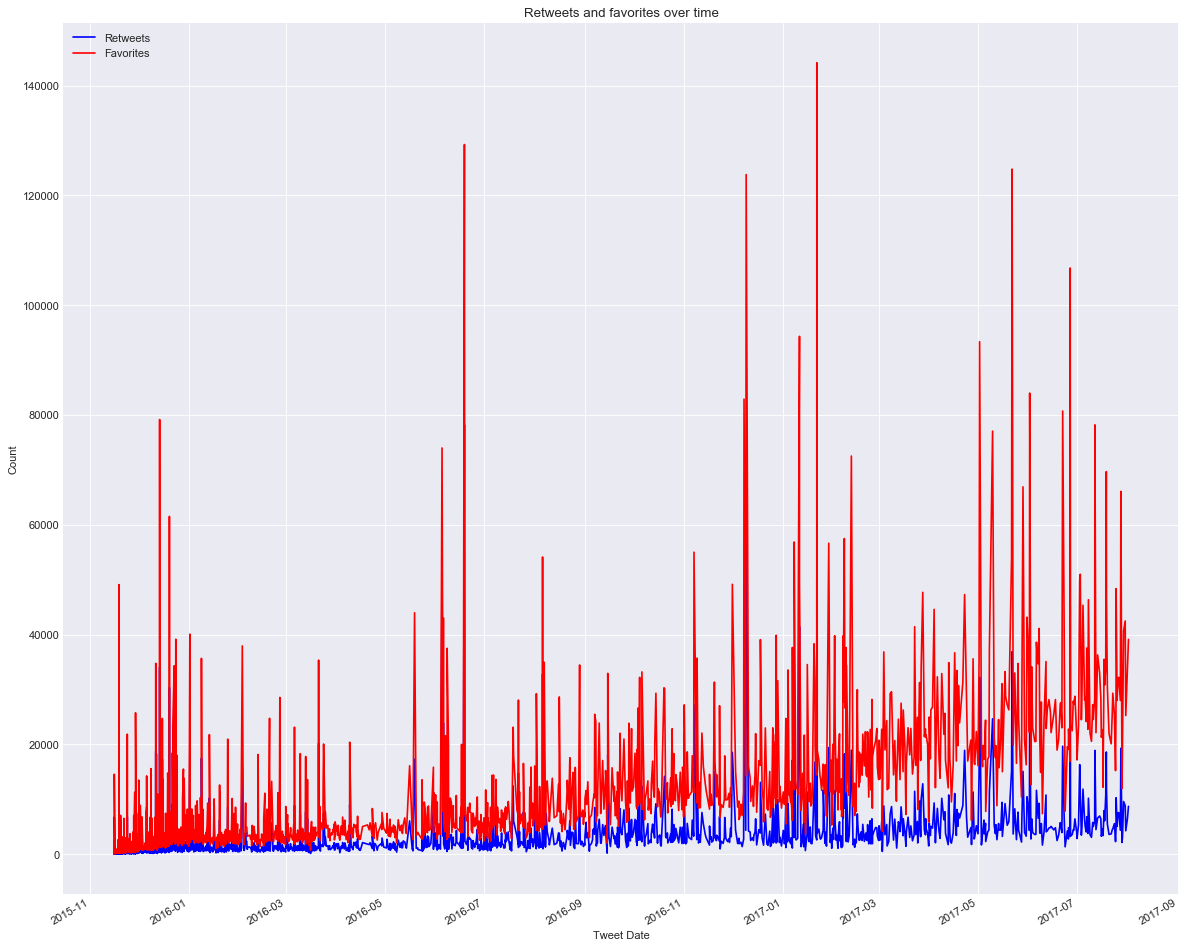

In [60]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

temp_df = master_df.copy()
temp_df = temp_df.set_index('tweet_date')

temp_df['retweet_count'].plot(color = 'blue', label='Retweets')
temp_df['favorite_count'].plot(color = 'red', label='Favorites')
plt.style.use('seaborn-darkgrid')
plt.legend(loc='upper left')
plt.xlabel('Tweet Date')
plt.ylabel('Count')
plt.title('Retweets and favorites over time')
plt.savefig('retweets_favorites.png')
plt.show()

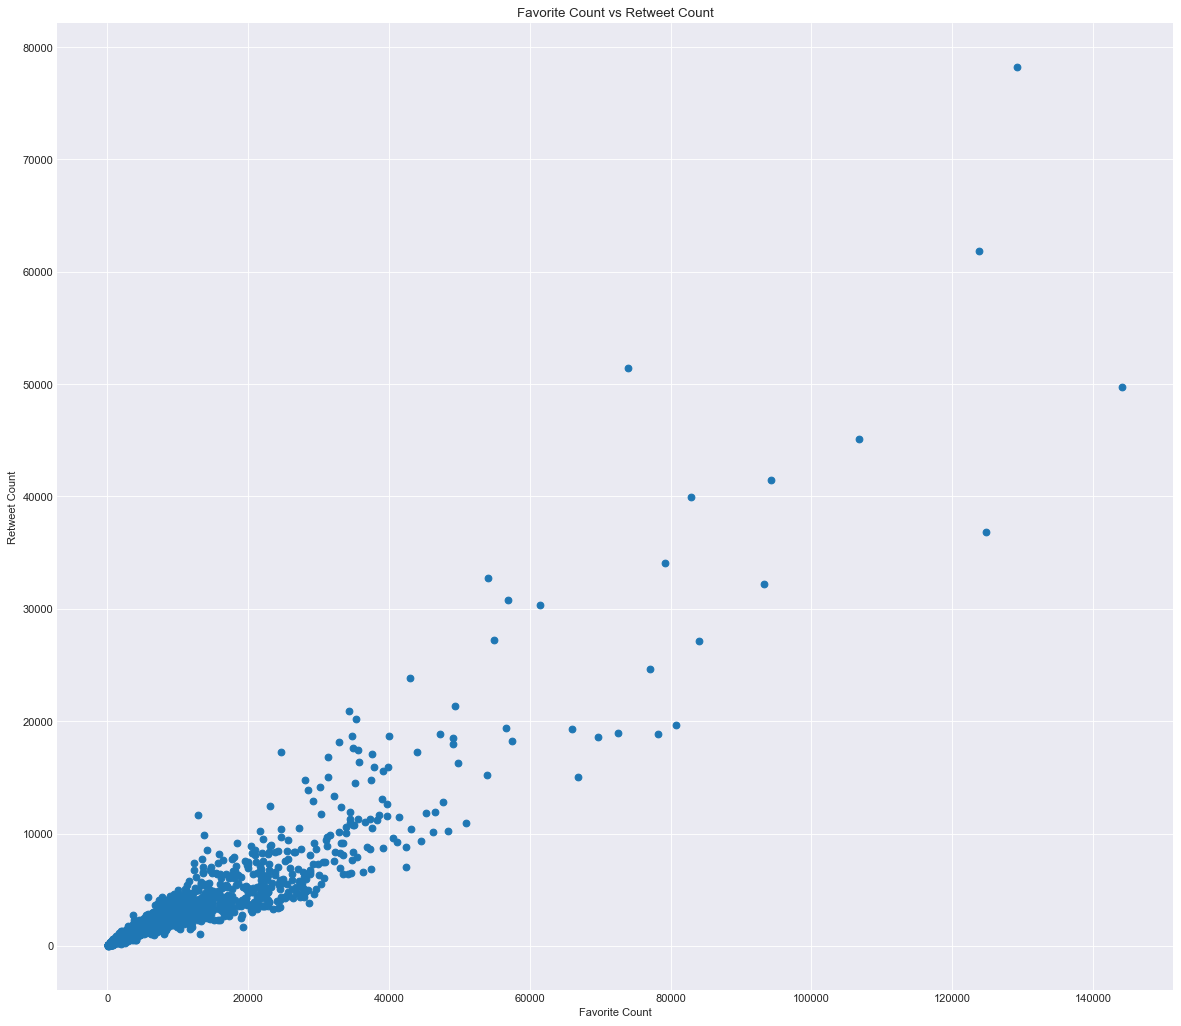

In [61]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(x=temp_df['favorite_count'], y=temp_df['retweet_count'])
plt.xlabel('Favorite Count');
plt.ylabel('Retweet Count');
plt.style.use('seaborn-darkgrid')
plt.title('Favorite Count vs Retweet Count');
plt.savefig('retweets_vs_favorites.png')
plt.show()

**2) Rating Over Time : ** 
> As seen below,
- Most of the data has a rating numerator less than 15.
- We invistigated this further below and found out that 75%(3rd Quartile) of data have rating numerator less than or equal to 12.

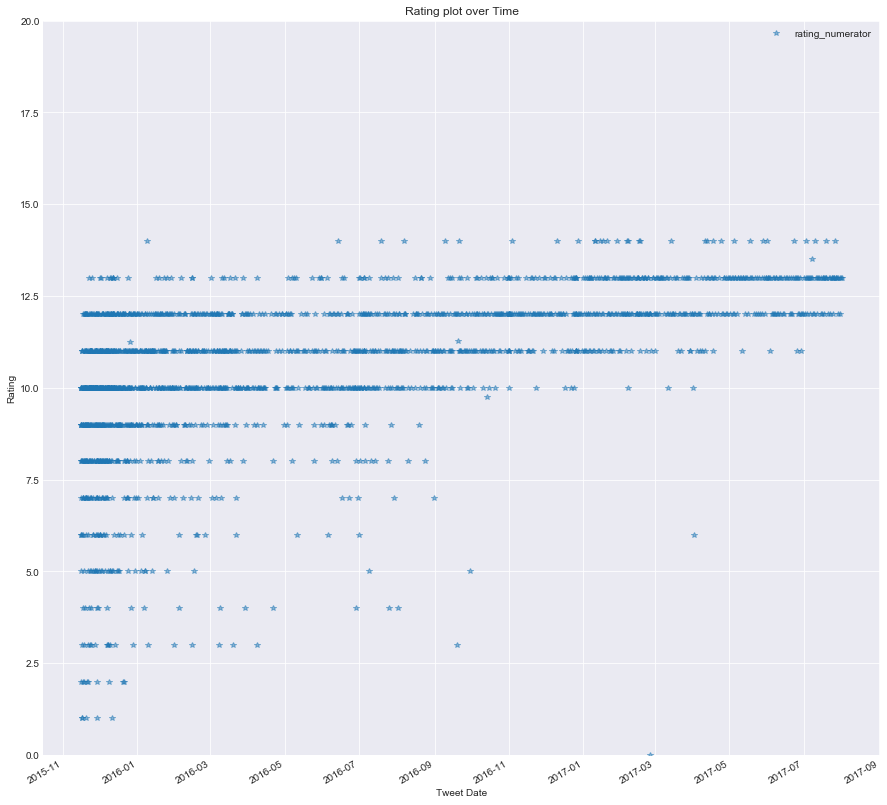

In [65]:
mpl.rcParams['figure.figsize'] = (15,15)
temp_df.plot(y ='rating_numerator', ylim=[0,20], style = '*', alpha = .5)
plt.title('Rating plot over Time')
plt.xlabel('Tweet Date')
plt.ylabel('Rating')
plt.savefig('Rating plot over Time.png')
#plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.show()

In [58]:
temp_df[temp_df['rating_numerator'] <= 15]['rating_numerator'].describe()

count    1956.000000
mean     10.532096  
std      2.185832   
min      0.000000   
25%      10.000000  
50%      11.000000  
75%      12.000000  
max      14.000000  
Name: rating_numerator, dtype: float64

**3) Dog Gender :**
> As seen below,
- It seems that the sample has more male dogs than female dogs.
- Although it's worth noting that nearly 32% are gender unknown.

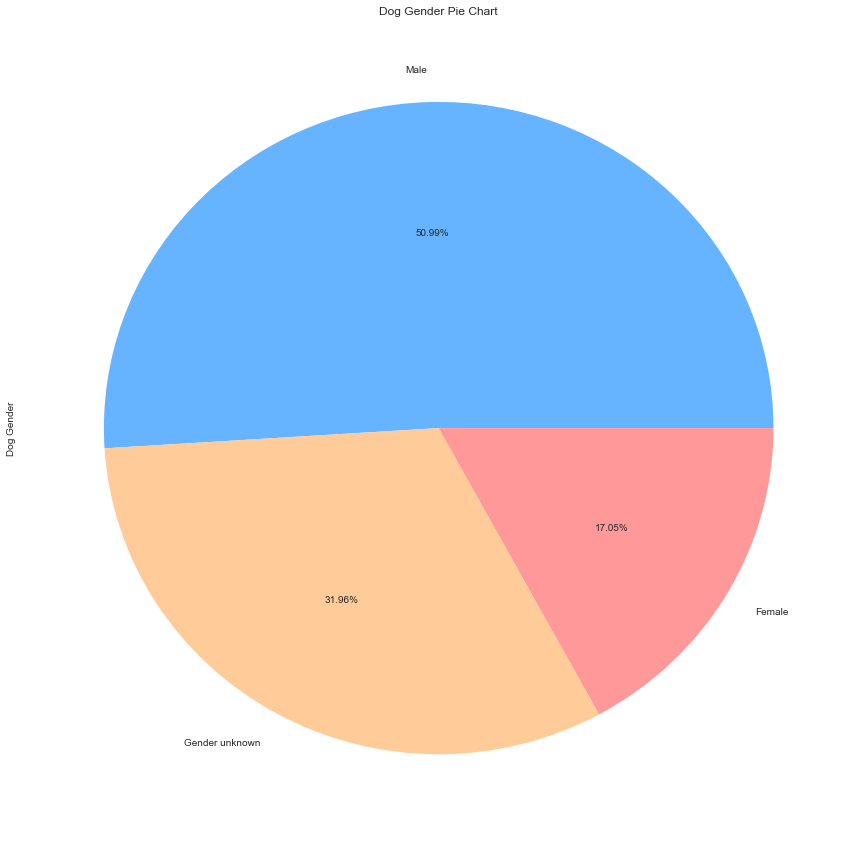

In [66]:
#df_master[df_master['dog_gender'].notnull()]['dog_gender'].value_counts().plot(kind = 'pie', autopct='%1.1f%%')
#plt.title('Dog Gender Partitions')

labels = ['Male', 'Gender unknown', 'Female']
colors = ['#66b3ff','#ffcc99','#ff9999']
temp_df['dog_gender'].value_counts().plot(kind = 'pie', autopct='%1.2f%%' , labels=labels, colors=colors)
plt.ylabel('Dog Gender')
plt.title('Dog Gender Pie Chart')
plt.savefig('Dog Gender Pie Chart.png')

